<a href="https://colab.research.google.com/github/jangInw007/JENZY_Project/blob/main/JENZY(nky)_is_perfect_project_Basicpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# path_to_stopandsearch = '/content/drive/MyDrive/JENZY/Data/2025-01'

In [67]:
import pandas as pd

In [68]:
# import os

# directory_path = '/content/drive/MyDrive/JENZY/Data/2025-01'
# files_in_directory = os.listdir(directory_path)

# print(f"Files in directory: {directory_path}")
# for file in files_in_directory:
#     print(file)

In [69]:
# # Use len() to get the number of items in the list
# num_files = len(files_in_directory)
# print(f"Number of files in the directory: {num_files}")

In [70]:
import os

base_path = '/content/drive/MyDrive/JENZY/Data/'
monthly_files = {}

for month in range(1, 6):  # Iterate from month 1 to 5
    month_str = f'2025-{month:02d}'  # Format month as 01, 02, etc.
    month_path = os.path.join(base_path, month_str)

    if os.path.exists(month_path) and os.path.isdir(month_path):
        files_in_month = os.listdir(month_path)
        monthly_files[month_str] = files_in_month
        print(f"Files in {month_str}:")
        for file in files_in_month:
            print(file)
        print("-" * 20) # Separator for clarity
    else:
        print(f"Directory not found: {month_path}")

# You can now access the list of files for each month using monthly_files['2025-01'], monthly_files['2025-02'], etc.

Directory not found: /content/drive/MyDrive/JENZY/Data/2025-01
Directory not found: /content/drive/MyDrive/JENZY/Data/2025-02
Directory not found: /content/drive/MyDrive/JENZY/Data/2025-03
Directory not found: /content/drive/MyDrive/JENZY/Data/2025-04
Directory not found: /content/drive/MyDrive/JENZY/Data/2025-05


In [71]:
file_type_counts = {}

for month, files in monthly_files.items():
    stop_and_search_count = 0
    street_count = 0
    outcomes_count = 0
    other_count = 0
    total_count = len(files) # Calculate total files in the month

    for file in files:
        if 'stop-and-search' in file:
            stop_and_search_count += 1
        elif 'street' in file:
            street_count += 1
        elif 'outcomes' in file:
            outcomes_count += 1
        else:
            other_count += 1

    file_type_counts[month] = {
        'stop-and-search': stop_and_search_count,
        'street': street_count,
        'outcomes': outcomes_count,
        'other': other_count,
        'total': total_count # Add total count to the dictionary
    }

print("File counts per month and type:")
for month, counts in file_type_counts.items():
    print(f"\n{month}:")
    print(f"  total: {counts['total']}") # Print total count first
    for file_type, count in counts.items():
        if file_type != 'total': # Avoid printing total twice
            print(f"  {file_type}: {count}")

File counts per month and type:


In [72]:
# Calculate the total number of files for each type across all months
num_stop_and_search = sum(counts['stop-and-search'] for counts in file_type_counts.values())
num_street = sum(counts['street'] for counts in file_type_counts.values())
num_outcomes = sum(counts['outcomes'] for counts in file_type_counts.values())
num_other = sum(counts['other'] for counts in file_type_counts.values())

print(f"Number of Stop and Search Files: {num_stop_and_search}")
print(f"Number of Street Files: {num_street}")
print(f"Number of Outcomes Files: {num_outcomes}")
if num_other > 0:
    print(f"Number of Other Files: {num_other}")

Number of Stop and Search Files: 0
Number of Street Files: 0
Number of Outcomes Files: 0


In [18]:

#Real HW4
# นำเข้าโมดูล drive จาก google.colab เพื่อเข้าถึง Google Drive
from google.colab import drive
# นำเข้าไลบรารี pandas สำหรับจัดการและวิเคราะห์ข้อมูล
import pandas as pd
# นำเข้าโมดูล os สำหรับโต้ตอบกับระบบปฏิบัติการ เช่น การแสดงรายการไฟล์
import os
# นำเข้า defaultdict จาก collections เพื่อช่วยในการสร้าง dictionary ที่มีค่าเริ่มต้น
from collections import defaultdict

# เชื่อมต่อ Google Drive เข้ากับสภาพแวดล้อม Colab
drive.mount('/content/drive')

# กำหนดพาธหลักไปยังโฟลเดอร์ข้อมูลใน Google Drive
# base_path = '/content/drive/MyDrive/JENZY/Data/2025-01'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
base_path = '/content/drive/MyDrive/Python&DataViz2025/Data'

In [20]:

# สร้างลิสต์ว่างๆ เพื่อเก็บ DataFrame จากไฟล์ CSV ทั้งหมด
all_data = []

# วนลูปผ่านแต่ละโฟลเดอร์ (แทนแต่ละเดือน) ในพาธข้อมูลหลัก อ่านชื่อไฟล์ทุกตัวที่อยู่ในไฟล์ base_path
for month in os.listdir(base_path):
    # สร้างพาธแบบเต็มไปยังโฟลเดอร์ของเดือนปัจจุบัน
    #/content/drive/MyDrive/Python&DataViz2025/Data/2025-02
    month_path = os.path.join(base_path, month)
#-------------------------------------------------------------------------------
    # ตรวจสอบว่ารายการปัจจุบันเป็นไดเรกทอรี (โฟลเดอร์) หรือไม่
    if not os.path.isdir(month_path):
        # หากไม่ใช่ไดเรกทอรี ให้ข้ามไปยังรายการถัดไป
        continue
    # วนลูปผ่านแต่ละไฟล์ในโฟลเดอร์ของเดือนปัจจุบัน
    for file in os.listdir(month_path):
        # ตรวจสอบว่า 'stop-and-search' อยู่ในชื่อไฟล์หรือไม่
        if 'stop-and-search' not in file:
            # หากไฟล์ไม่ใช่ไฟล์ stop-and-search ให้ข้ามไปยังไฟล์ถัดไป
            continue
        # สร้างพาธแบบเต็มไปยังไฟล์ปัจจุบัน
        filepath = os.path.join(month_path, file)
#-------------------------------------------------------------------------------
        # ใช้บล็อก try-except เพื่อจัดการข้อผิดพลาดที่อาจเกิดขึ้นระหว่างการอ่านไฟล์
        try:
            # อ่านไฟล์ CSV เข้ามาเก็บไว้ใน pandas DataFrame
            df = pd.read_csv(filepath)
            # แยกชื่อเมืองออกจากชื่อไฟล์
            # โดยการแยกชื่อไฟล์ด้วย '-' และนำส่วนที่อยู่หลังปีและเดือน
            # จากนั้นรวมส่วนที่เหลือด้วย '-' และลบช่องว่างที่นำหน้า/ตามหลัง
            file_parts = file.replace('-stop-and-search.csv', '').split('-')
            #['2025', '01', 'bedfordshire']
            #['2025', '01', 'west', 'midlands']
            city = '-'.join(file_parts[2:]).strip()
            # เพิ่มคอลัมน์ใหม่ 'City' ไปยัง DataFrame และเติมชื่อเมืองที่แยกได้ลงไป
            df['City'] = city
            # เพิ่ม DataFrame ที่ประมวลผลแล้วเข้าในลิสต์ all_data
            all_data.append(df)
        # ดักจับข้อยกเว้นใดๆ ที่เกิดขึ้นระหว่างการประมวลผลไฟล์
        except Exception as e:
            # พิมพ์ข้อความแสดงข้อผิดพลาดหากไม่สามารถอ่านไฟล์ได้
            print(f"อ่านไฟล์ไม่ได้: {filepath} : {e}")


In [21]:
# Combine all DataFrames in the list into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Get the unique city names from the 'City' column
unique_cities_in_data = combined_df['City'].unique()

print("Unique cities found in the combined data:")
for city in unique_cities_in_data:
    print(city)

print(f"\nTotal number of unique cities in the combined data: {len(unique_cities_in_data)}")

Unique cities found in the combined data:
avon-and-somerset
bedfordshire
btp
cambridgeshire
cheshire
city-of-london
cleveland
cumbria
derbyshire
devon-and-cornwall
dorset
durham
dyfed-powys
essex
gloucestershire
hampshire
hertfordshire
kent
lancashire
leicestershire
metropolitan
norfolk
northamptonshire
northumbria
north-wales
nottinghamshire
south-wales
south-yorkshire
staffordshire
suffolk
surrey
sussex
thames-valley
warwickshire
west-mercia
west-midlands
west-yorkshire
merseyside

Total number of unique cities in the combined data: 38


----------------------------------------------------------------

# รวม stop and Search 2025-01 ถึง 2025-05

combined_stop_and_search_2025_all_months

In [22]:
import os
import pandas as pd
# นำเข้า display เพื่อให้โค้ดทำงานได้สมบูรณ์ในสภาพแวดล้อมที่รองรับ (เช่น Jupyter/Colab)
from IPython.display import display

base_path = '/content/drive/MyDrive/Python&DataViz2025/Data'
all_stop_and_search_dfs = []
file_type = 'stop-and-search' # กำหนดตัวแปรสำหรับประเภทไฟล์

for month in range(1, 6):  # Iterate from month 1 to 5
    month_str = f'2025-{month:02d}'  # Format month as 01, 02, etc.
    month_path = os.path.join(base_path, month_str)

    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if f'{file_type}.csv' in file: # ใช้ f-string เพื่อความยืดหยุ่น
                filepath = os.path.join(month_path, file)
                try:
                    df = pd.read_csv(filepath)

                    # Extract Police Force name from filename
                    file_suffix = f'-{file_type}.csv'
                    file_parts = file.replace(file_suffix, '').split('-')

                    # เปลี่ยนชื่อตัวแปรเป็น 'police_force' เพื่อความสม่ำเสมอ
                    police_force = '-'.join(file_parts[2:]).strip()

                    # **การปรับปรุง:** เปลี่ยนชื่อคอลัมน์จาก 'City' เป็น 'Police_Force'
                    df['Police_Force'] = police_force

                    # Add Month column with only the month number
                    df['Month'] = f'{month:02d}'

                    all_stop_and_search_dfs.append(df)

                except Exception as e:
                    print(f"Error reading file: {filepath} : {e}")
    else:
        print(f"Directory not found: {month_path}")

if all_stop_and_search_dfs:
    combined_stop_and_search_2025_all_months = pd.concat(all_stop_and_search_dfs, ignore_index=True)
    print(f"Combined DataFrame from 2025-01 to 2025-05 {file_type} files with 'Police_Force' and 'Month' columns:")
    print(f"Total rows in combined {file_type} data: {len(combined_stop_and_search_2025_all_months)}")
    display(combined_stop_and_search_2025_all_months.tail()) # ใช้ .head() แทน .tail() เพื่อแสดงผลตั้งแต่ต้น
else:
    print(f"No {file_type} files found in the specified directories.")

Combined DataFrame from 2025-01 to 2025-05 stop-and-search files with 'Police_Force' and 'Month' columns:
Total rows in combined stop-and-search data: 155291


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Force,Month
155286,Person search,2025-05-31T20:40:00+00:00,False,NaN,53.723700,-1.349975,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,True,False,west-yorkshire,05
155287,Person search,2025-05-31T21:45:00+00:00,False,NaN,53.792204,-1.752853,Male,18-24,NaN,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,False,False,west-yorkshire,05
155288,Person and Vehicle search,2025-05-31T21:50:00+00:00,False,NaN,53.594755,-1.317975,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,True,west-yorkshire,05
155289,Person search,2025-05-31T22:00:00+00:00,False,NaN,53.801903,-1.581361,Male,over 34,NaN,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False,west-yorkshire,05
155290,Person search,2025-05-31T22:23:00+00:00,False,NaN,53.796033,-1.541964,Male,10-17,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,True,False,west-yorkshire,05


In [23]:
combined_stop_and_search_2025_all_months.isnull().sum()

,0
Type,0
Date,0
Part of a policing operation,84611
Policing operation,155291
Latitude,19491
Longitude,19491
Gender,10977
Age range,19543
Self-defined ethnicity,12919
Officer-defined ethnicity,12561


## จัดการค่าว่าง 2 คน สีหนุ่ม อีฟ

Part of a policing operation	84611
- เติม Unknown

Policing operation	155291
- มีแต่ค่าว่าง ลบออก

Latitude	19491
- ดู mean mode median

Longitude	19491
- ดู mean mode median

Gender	10977
- Unknown

Age range	19543
- ดู mean mode median
- ลองดูวิธีที่อาจารย์พาทำ

Self-defined ethnicity	12919
- Unknown

Officer-defined ethnicity	12561
- Unknown

Legislation	6032
- Unknown

Object of search	17791
- Unknown

Outcome	7327
- Not Recorded

Outcome linked to object of search	63650
- Unknown

Removal of more than just outer clothing
- Unknown

In [24]:
combined_stop_and_search_2025_all_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155291 entries, 0 to 155290
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Type                                      155291 non-null  object 
 1   Date                                      155291 non-null  object 
 2   Part of a policing operation              70680 non-null   object 
 3   Policing operation                        0 non-null       float64
 4   Latitude                                  135800 non-null  float64
 5   Longitude                                 135800 non-null  float64
 6   Gender                                    144314 non-null  object 
 7   Age range                                 135748 non-null  object 
 8   Self-defined ethnicity                    142372 non-null  object 
 9   Officer-defined ethnicity                 142730 non-null  object 
 10  Legislation         

# รวม Outcomes 2025-01 ถึง 2025-05

combined_outcomes_2025_all_months

In [25]:
import os
import pandas as pd

# Corrected base_path to the actual data location
base_path = '/content/drive/MyDrive/Python&DataViz2025/Data'
all_outcomes_dfs = []

for month in range(1, 6):  # Iterate from month 1 to 5
    month_str = f'2025-{month:02d}'
    month_path = os.path.join(base_path, month_str)

    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if 'outcomes.csv' in file:
                filepath = os.path.join(month_path, file)
                try:
                    df = pd.read_csv(filepath)

                    # 1. Extract Police Force Name (renamed from City for consistency)
                    # Example filename: 2025-01-avon-and-somerset-outcomes.csv
                    # We want 'avon-and-somerset'
                    file_parts = file.replace('-outcomes.csv', '').split('-')
                    police_force = '-'.join(file_parts[2:]).strip()
                    df['Police_Force'] = police_force

                    # 2. Add Month column (as 01, 02, etc.)
                    df['Month'] = f'{month:02d}'

                    # 3. CRITICAL FIX: Append the DataFrame only once
                    all_outcomes_dfs.append(df)

                except Exception as e:
                    print(f"Error reading file: {filepath} : {e}")
    else:
        print(f"Directory not found: {month_path}")

if all_outcomes_dfs:
    combined_outcomes_2025_all_months = pd.concat(all_outcomes_dfs, ignore_index=True)
    print("Combined DataFrame from 2025-01 to 2025-05 outcomes files with 'Police_Force' and 'Month' columns:")
    print(f"Total rows in combined outcomes data: {len(combined_outcomes_2025_all_months)}")
    display(combined_outcomes_2025_all_months.tail(5))
else:
    print("No outcomes files found in the specified directories.")

Combined DataFrame from 2025-01 to 2025-05 outcomes files with 'Police_Force' and 'Month' columns:
Total rows in combined outcomes data: 794203


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force
794198,626e22babc731a732583a55a8b7cd3e3bf35fb468fec11...,05,Wiltshire Police,Wiltshire Police,-2.137578,51.372429,On or near Watson's Court,E01032068,Wiltshire 022D,Investigation complete; no suspect identified,wiltshire
794199,3147bcee9f8984a56eca43b272ff501f69d987960428c4...,05,Wiltshire Police,Wiltshire Police,-1.781431,51.558845,On or near Regent Circus,E01032714,Swindon 019E,Investigation complete; no suspect identified,wiltshire
794200,d95e10fc53ae2a66eb15a8355e19e684f9689e2d430d2c...,05,Wiltshire Police,Wiltshire Police,-1.977236,51.083878,On or near Spracklands,E01032004,Wiltshire 054B,Investigation complete; no suspect identified,wiltshire
794201,deb166f2809eed9b8d4ec3995e748ef56885755eabfb06...,05,Wiltshire Police,Wiltshire Police,-1.766340,51.169476,On or near Jaggard View,E01031978,Wiltshire 048E,Investigation complete; no suspect identified,wiltshire
794202,b69e992b234daa9feaf4a33e636ca96b2eafb28bac24a5...,05,Wiltshire Police,Wiltshire Police,-1.769992,51.561863,On or near Dudmore Road,E01015574,Swindon 017C,Formal action is not in the public interest,wiltshire


In [26]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11697
Latitude,11697
Location,0
LSOA code,11699
LSOA name,11699
Outcome type,0


In [27]:
# Group by Month and get unique cities in each month
unique_police_forces_per_month = combined_outcomes_2025_all_months.groupby('Month')['Police_Force'].unique()

print("Unique police forces found in each month:")
display(unique_police_forces_per_month)

# Count the number of unique cities per month
num_unique_police_forces_per_month = combined_outcomes_2025_all_months.groupby('Month')['Police_Force'].nunique()

print("\nNumber of unique police forces in each month:")
display(num_unique_police_forces_per_month)

Unique police forces found in each month:


,Police_Force
Month,
01,"[cambridgeshire, city-of-london, bedfordshire,..."
02,"[city-of-london, bedfordshire, avon-and-somers..."
03,"[city-of-london, bedfordshire, gloucestershire..."
04,"[city-of-london, bedfordshire, dorset, dyfed-p..."
05,"[city-of-london, dyfed-powys, bedfordshire, gw..."



Number of unique police forces in each month:


,Police_Force
Month,
01,42
02,30
03,11
04,10
05,8


In [28]:
# Get a list of all unique cities across all months
all_unique_police_forces = set()
for month_forces in unique_police_forces_per_month.values:
    all_unique_police_forces.update(month_forces)

# Find cities that appear in every month
police_forces_in_all_months = []
for police_force in all_unique_police_forces:
    count = 0
    for month, forces in unique_police_forces_per_month.items():
        if police_force in forces:
            count += 1
    if count == 5:  # Check if the city appears in all 5 months
        police_forces_in_all_months.append(police_force)

print("\nPolice forces appearing in all 5 months:")
display(police_forces_in_all_months)


Police forces appearing in all 5 months:


['gwent',
 'wiltshire',
 'bedfordshire',
 'north-wales',
 'suffolk',
 'warwickshire',
 'dyfed-powys',
 'city-of-london']

##จัดการค่าว่าง แจง

Longitude	23394
- ดู mean mode median

Latitude	23394
- ดู mean mode median

LSOA code	23398
- Unknown
- ลองดูวิธีอื่น

LSOA name	23398
- Unknown
- ลองดูวิธีอื่น

# รวม Street 2025-01 ถึง 2025-05

combined_street_2025_all_months

In [29]:
import os
import pandas as pd
from IPython.display import display # Import display for use with .tail()

# --- Configuration ---
base_path = '/content/drive/MyDrive/Python&DataViz2025/Data'
file_type = 'street' # ตั้งชื่อประเภทไฟล์ที่เราต้องการรวม

# --- Data Collection ---
all_dfs = [] # ใช้ตัวแปรกลางที่ชื่อ 'all_dfs' แทน all_outcomes_dfs

for month in range(1, 6):  # Iterate from month 1 to 5
    month_str = f'2025-{month:02d}'
    month_path = os.path.join(base_path, month_str)

    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            # ตรวจสอบชื่อไฟล์ให้ตรงกับประเภทที่เราต้องการ (เช่น 'street.csv')
            if f'{file_type}.csv' in file:
                filepath = os.path.join(month_path, file)

                # *** ข้อผิดพลาดหลักถูกแก้ตรงนี้: ย้าย try/except เข้ามาในลูปไฟล์ ***
                try:
                    df = pd.read_csv(filepath)

                    # 1. Extract Police Force Name (แทนที่ -street.csv ด้วยค่าที่ถูกต้อง)
                    # Example filename: 2025-01-avon-and-somerset-street.csv
                    # คำสั่ง .replace ต้องเปลี่ยนตามประเภทไฟล์

                    # คำนวณส่วนของชื่อไฟล์ที่จะลบออก: '-street.csv'
                    file_suffix = f'-{file_type}.csv'

                    # การดึงชื่อ Police_Force:
                    file_parts = file.replace(file_suffix, '').split('-')
                    # ชื่อกองกำลังจะเริ่มตั้งแต่ Index 2 เป็นต้นไป (2025, 01, avon-and-somerset)
                    police_force = '-'.join(file_parts[2:]).strip()
                    df['Police_Force'] = police_force

                    # 2. Add Month column (as 01, 02, etc.)
                    df['Month'] = f'{month:02d}'

                    # 3. Append the DataFrame (ไม่ซ้ำซ้อน)
                    all_dfs.append(df)

                except Exception as e:
                    print(f"Error reading file: {filepath} : {e}")
    else:
        print(f"Directory not found: {month_path}")

# --- Final Combination ---
if all_dfs:
    # เปลี่ยนชื่อตัวแปรผลลัพธ์ให้ตรงกับประเภทไฟล์ (street)
    combined_street_2025_all_months = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined DataFrame from 2025-01 to 2025-05 {file_type} files with 'Police_Force' and 'Month' columns:")
    print(f"Total rows in combined {file_type} data: {len(combined_street_2025_all_months)}")
    display(combined_street_2025_all_months.tail(5))
else:
    print(f"No {file_type} files found in the specified directories.")

Combined DataFrame from 2025-01 to 2025-05 street files with 'Police_Force' and 'Month' columns:
Total rows in combined street data: 684676


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Police_Force
684671,c73a19e8066d8b25412ad81d00f9b54fae91ef30093f91...,05,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Shoplifting,Under investigation,NaN,wiltshire
684672,e6912d9619a46e5bd3c497df787c1fd33e8ef2e62d4a49...,05,Wiltshire Police,Wiltshire Police,-1.660471,51.225777,On or near Ramnuggur Road,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN,wiltshire
684673,21f16dedc869d33913f9d004a3e95913e5d8fa2e6b5a5f...,05,Wiltshire Police,Wiltshire Police,-1.661154,51.234168,On or near Supermarket,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN,wiltshire
684674,0ac70d59536954f60110fb47d338d40d486314af217a8b...,05,Wiltshire Police,Wiltshire Police,-1.660471,51.225777,On or near Ramnuggur Road,E01034558,Wiltshire 066E,Violence and sexual offences,Under investigation,NaN,wiltshire
684675,84ea5f38b46e9f567d9b4e2259e366f370cb8a913852be...,05,Wiltshire Police,Wiltshire Police,-1.660922,51.234554,On or near Station Road,E01034558,Wiltshire 066E,Violence and sexual offences,Unable to prosecute suspect,NaN,wiltshire


In [30]:
combined_street_2025_all_months.isnull().sum()

,0
Crime ID,100191
Month,0
Reported by,0
Falls within,0
Longitude,11631
Latitude,11631
Location,0
LSOA code,11736
LSOA name,11736
Crime type,0


## จัดการค่าว่าง หยก น้ำขิง

Crime ID
- Unknown

Longitude	23262
- ดู mean mode median

Latitude	23262
- ดู mean mode median

LSOA code	23472
- Unknown
- ลองดูวิธีอื่น

LSOA name	23472
- Unknown
- ลองดูวิธีอื่น


Last outcome category	200382
- Unknown

Context	1369352
- มีแต่ค่าว่าง ลบไปเถอะ

1.อธิบายข้อมูล ว่าข้อมูลที่ใช้คืออะไร

1.ดูว่ามีไฟล์กี่ประเภท เช่น stop and search...

2.มีกี่เมืองในแต่ละเดือน

3.แต่ละประเภท ในแต่ละ เดือน มีเมืองเท่ากันไหม

2.เตรียมข้อมูล ทำความสะอาดข้อมูล

3.ข้อมูลจริงที่จะนำไปทำ dashboard

- ทำกราฟก่อนไปlooker

Visualize_Table_Data.ipynb
- Headmap
- pandas: parallel coordinate
- pandas: scatter matrix
- Scatter plot

Visualize_Data_Distribution.ipynb
- ใช้ขนาดของ marker แสดงค่าของ feature
- ตัวแปร Marker ใช้ในการเปลี่ยนหน้าตาของ marker
- การ plot กราฟหลายๆอันซ้อนกัน
- Plot-Legend

Visualize_Data_Comparison_2025.ipynb
- Bar chart (กราฟแท่ง)
- Stacked barchart
- Group barchart
- tree map
- Radar Chart

นี่คือแผนการวิเคราะห์และนำเสนอข้อมูลของคุณเป็นภาษาไทย:

1. **การสำรวจและทำความสะอาดข้อมูล**: ตรวจสอบโครงสร้างและเนื้อหาของ DataFrame ที่รวมแต่ละประเภท. ระบุและจัดการกับค่าที่หายไป, ประเภทข้อมูลที่ไม่สอดคล้องกัน, และข้อมูลที่อาจเป็นค่าผิดปกติ.
2. **การวิเคราะห์เชิงพรรณนาเบื้องต้น**: คำนวณสถิติพื้นฐานสำหรับคอลัมน์หลัก (เช่น จำนวนประเภทอาชญากรรม, ผลลัพธ์การหยุดและตรวจค้น, ช่วงอายุ, เพศ) ในแต่ละ DataFrame.
3. **วิเคราะห์แนวโน้มตามช่วงเวลา**: วิเคราะห์แนวโน้มรายเดือนสำหรับเหตุการณ์การหยุดและตรวจค้น, ผลลัพธ์, และอาชญากรรมบนท้องถนน.
4. **วิเคราะห์ข้อมูลตามเมือง**: วิเคราะห์ข้อมูลเพื่อเปรียบเทียบอัตราการเกิดอาชญากรรม, กิจกรรมการหยุดและตรวจค้น, และผลลัพธ์ในเมืองต่างๆ.
5. **วิเคราะห์ข้าม DataFrame**: เชื่อมหรือรวม DataFrame ตามคอลัมน์ทั่วไป (ถ้ามี) เพื่อสำรวจความสัมพันธ์ระหว่างเหตุการณ์การหยุดและตรวจค้น, อาชญากรรมบนท้องถนน, และผลลัพธ์.
6. **สร้างภาพข้อมูลเพื่อแสดงผลลัพธ์หลัก**: สร้างภาพข้อมูล (เช่น กราฟแท่ง, กราฟเส้น, แผนที่) เพื่อนำเสนอผลลัพธ์หลักจากการวิเคราะห์.
7. **กำหนดคำถามที่เฉพาะเจาะจง**: จากการสำรวจและวิเคราะห์ข้อมูล กำหนดคำถามที่เฉพาะเจาะจงที่สามารถตอบได้โดยใช้ข้อมูล.
8. **ตอบคำถามที่เฉพาะเจาะจง**: ใช้ข้อมูลที่ทำความสะอาดแล้วและผลการวิเคราะห์เพื่อตอบคำถามที่เฉพาะเจาะจง.
9. **สรุปผลการค้นพบ**: สรุปผลการค้นพบและข้อมูลเชิงลึกที่สำคัญจากการวิเคราะห์.
10. **เสร็จสิ้นภารกิจ**: นำเสนอผลการค้นพบที่สรุปและภาพข้อมูลต่อผู้ใช้.

Here are some new specific questions to analyze your data:

**General Trends:**

*   How has the total number of stop and search incidents, street crimes, and outcomes changed month-over-month from January to May 2025?
*   Which cities have the highest and lowest numbers of stop and search incidents, street crimes, and outcomes in total and for each month?

**Stop and Search Analysis:**

*   What are the most common types of stop and search incidents (`Type`)?
*   What are the most frequently searched objects (`Object of search`)?
*   What are the most common outcomes (`Outcome`) of stop and search incidents?
*   Is there a relationship between the `Type` of stop and search and the `Outcome`?
*   How does the distribution of stop and search incidents by `Gender`, `Age range`, and `Ethnicity` vary across cities and over time?
*   What percentage of stop and search incidents resulted in an `Outcome linked to object of search`?

**Outcomes Analysis:**

*   What are the most frequent `Outcome type` for street crimes?
*   Are there specific `Crime type` that are more likely to result in certain `Outcome type`?
*   How does the distribution of `Outcome type` vary across cities and over time?

**Street Crime Analysis:**

*   What are the most common `Crime type` reported in each city and month?
*   Are there specific locations (`Location` or `LSOA name`) that have a higher concentration of certain `Crime type`?
*   How has the distribution of `Crime type` changed over the months?

**Cross-Dataset Analysis:**

*   Can we link stop and search incidents to specific street crimes or outcomes based on location and time? (This might require cleaning and standardizing date and location data).
*   Is there a correlation between the number of stop and search incidents in a city and the number of street crimes or outcomes?

These questions can serve as a starting point for your data analysis and visualization in Looker Studio.

ต่อไปนี้คือคำถามเฉพาะเจาะจงเพิ่มเติมที่คุณสามารถใช้เพื่อวิเคราะห์ข้อมูลของคุณ:

**แนวโน้มทั่วไป:**

*   จำนวนเหตุการณ์ Stop and Search, อาชญากรรมบนท้องถนน และผลลัพธ์โดยรวม มีการเปลี่ยนแปลงอย่างไรในแต่ละเดือน ตั้งแต่เดือนมกราคมถึงพฤษภาคม 2025?
*   เมืองใดมีจำนวนเหตุการณ์ Stop and Search, อาชญากรรมบนท้องถนน และผลลัพธ์สูงสุดและต่ำสุด ทั้งหมดและในแต่ละเดือน?

**การวิเคราะห์ Stop and Search:**

*   ประเภทเหตุการณ์ Stop and Search ที่พบบ่อยที่สุด (`Type`) คืออะไร?
*   วัตถุที่ถูกค้นหาบ่อยที่สุด (`Object of search`) คืออะไร?
*   ผลลัพธ์ (`Outcome`) ที่พบบ่อยที่สุดของเหตุการณ์ Stop and Search คืออะไร?
*   มีความสัมพันธ์ระหว่างประเภทของ Stop and Search (`Type`) และผลลัพธ์ (`Outcome`) หรือไม่?
*   การกระจายของเหตุการณ์ Stop and Search ตามเพศ (`Gender`), ช่วงอายุ (`Age range`) และชาติพันธุ์ (`Ethnicity`) แตกต่างกันไปในแต่ละเมืองและตามช่วงเวลาอย่างไร?
*   เหตุการณ์ Stop and Search กี่เปอร์เซ็นต์ที่ส่งผลให้มี `Outcome linked to object of search`?

**การวิเคราะห์ผลลัพธ์ (Outcomes):**

*   ประเภทผลลัพธ์ (`Outcome type`) ที่พบบ่อยที่สุดสำหรับอาชญากรรมบนท้องถนนคืออะไร?
*   มีประเภทอาชญากรรม (`Crime type`) เฉพาะที่มักจะส่งผลให้เกิดประเภทผลลัพธ์ (`Outcome type`) บางอย่างหรือไม่?
*   การกระจายของประเภทผลลัพธ์ (`Outcome type`) แตกต่างกันไปในแต่ละเมืองและตามช่วงเวลาอย่างไร?

**การวิเคราะห์อาชญากรรมบนท้องถนน (Street Crime):**

*   ประเภทอาชญากรรม (`Crime type`) ที่พบบ่อยที่สุดที่รายงานในแต่ละเมืองและแต่ละเดือนคืออะไร?
*   มีสถานที่เฉพาะ (`Location` หรือ `LSOA name`) ที่มีความเข้มข้นของประเภทอาชญากรรมบางประเภทสูงกว่าหรือไม่?
*   การกระจายของประเภทอาชญากรรม (`Crime type`) เปลี่ยนแปลงไปอย่างไรในแต่ละเดือน?

**การวิเคราะห์ข้ามชุดข้อมูล:**

*   เราสามารถเชื่อมโยงเหตุการณ์ Stop and Search กับอาชญากรรมบนท้องถนนหรือผลลัพธ์ที่เฉพาะเจาะจงได้หรือไม่ โดยอิงตามตำแหน่งและเวลา? (อาจต้องมีการทำความสะอาดและทำให้ข้อมูลวันที่และตำแหน่งเป็นมาตรฐาน)
*   มีความสัมพันธ์ระหว่างจำนวนเหตุการณ์ Stop and Search ในเมืองหนึ่งกับจำนวนอาชญากรรมบนท้องถนนหรือผลลัพธ์หรือไม่?

คำถามเหล่านี้สามารถใช้เป็นจุดเริ่มต้นสำหรับการวิเคราะห์ข้อมูลและการสร้างภาพข้อมูลของคุณใน Looker Studio ได้

แน่นอนค่ะ! เมื่อข้อมูล 5 เดือนของคุณพร้อมและมีการสร้างตัวชี้วัดหลัก (KPIs) แล้ว คำถามเหล่านี้จะช่วยให้คุณดึงข้อสรุปที่ทรงพลังที่สุดจาก Dashboard เพื่อตอบโจทย์การวิเคราะห์และนำไปสู่การตัดสินใจเชิงนโยบายได้ค่ะ

---

## 1. คำถามเชิงแนวโน้มและการจัดอันดับ (Trends & Benchmarking)

คำถามเหล่านี้เน้นการเปรียบเทียบประสิทธิภาพและการเปลี่ยนแปลงตามเวลาในภาพรวมของทั้ง 38 กองกำลัง

1.  **ภาพรวมอาชญากรรมเปลี่ยนแปลงอย่างไร?**
    * **แนวโน้มปริมาณอาชญากรรม (Total Street Incidents)** ของประเทศในภาพรวมมีการเพิ่มขึ้นหรือลดลงในช่วง **เดือนมกราคมถึงพฤษภาคม**? และการเปลี่ยนแปลงนี้มีความผันผวนระหว่างช่วงต้นปี (ม.ค.-ก.พ.) กับช่วงล่าสุด (เม.ย.-พ.ค.) หรือไม่?
2.  **ใครคือผู้นำด้านประสิทธิภาพ?**
    * กองกำลังตำรวจใดที่ติดอันดับ **Top 5** ในด้าน **อัตราการคลี่คลายคดี (Resolution Rate)** และ **อัตราความสำเร็จในการตรวจค้น (Search Success Rate)** ในค่าเฉลี่ย 5 เดือน? และอะไรคือปัจจัยที่อาจส่งผลให้พวกเขามีประสิทธิภาพสูง?
3.  **ปัญหาหลักของภูมิภาคที่แย่ที่สุดคืออะไร?**
    * กองกำลังตำรวจที่อยู่ในอันดับ **Bottom 5** ในด้าน Resolution Rate มีปัญหาหลักอยู่ที่ **ประเภทอาชญากรรม (Crime Type)** ใด (เช่น ลักทรัพย์ หรือความรุนแรง) ที่มีอัตราการปิดคดีโดยไม่พบผู้ต้องสงสัยสูงที่สุด?
4.  **กองกำลังที่เลือกมีการปรับปรุงหรือไม่?**
    * สำหรับกองกำลังตำรวจที่คุณสนใจ **(ใช้ตัวกรอง Multi-select)** แนวโน้มของ **Resolution Rate** มีการปรับปรุงขึ้นอย่างต่อเนื่องในแต่ละเดือน (MoM) หรือไม่? และสถิติเริ่มลดลงตั้งแต่เดือนใด?

---

## 2. คำถามเชิงลึกเกี่ยวกับอาชญากรรมและพื้นที่ (Crime & Location Deep Dive)

คำถามเหล่านี้ใช้ข้อมูลดิบ (Street และ Outcomes) เพื่อเจาะลึกรูปแบบการเกิดเหตุการณ์

1.  **จุดเสี่ยงย้ายไปที่ใด?**
    * **Hotspots (พื้นที่เกิดเหตุหนาแน่นที่สุด)** ของอาชญากรรมในเดือนพฤษภาคม มีการเปลี่ยนแปลงเชิงพื้นที่อย่างมีนัยสำคัญ **เมื่อเทียบกับเดือนมกราคม** หรือไม่? (เช่น จุดเสี่ยงย้ายจากย่านใจกลางเมืองไปสู่พื้นที่ชานเมือง/ที่อยู่อาศัย)
2.  **ประเภทอาชญากรรมที่น่ากังวลที่สุดคืออะไร?**
    * อาชญากรรมประเภทใดที่มีแนวโน้ม **เพิ่มขึ้นอย่างต่อเนื่อง** (ใช้ Line Chart แนวโน้ม 5 เดือน) และอาชญากรรมประเภทนั้นมี **อัตราการตั้งข้อหา (Suspect Charged)** ต่ำที่สุดหรือไม่? (บ่งชี้ถึงปัญหาอาชญากรรมที่เพิ่มขึ้นและคลี่คลายยาก)
3.  **ผลลัพธ์คดีมีความแตกต่างกันอย่างไร?**
    * เมื่อเปรียบเทียบอาชญากรรมประเภท **'การทำลายทรัพย์สิน'** กับ **'การขโมย'** องค์ประกอบของ **Outcome Type** (เช่น ตั้งข้อหา vs. ปิดคดีโดยไม่มีผู้ต้องสงสัย) มีความแตกต่างกันอย่างไร และสิ่งนี้ชี้ให้เห็นถึงความท้าทายในการรวบรวมหลักฐานของคดีประเภทใด?

---

## 3. คำถามเชิงความยุติธรรมและการปฏิบัติงาน (Fairness & Practice Analysis)

คำถามเหล่านี้ใช้ข้อมูล Stop and Search เพื่อประเมินความเท่าเทียมและจริยธรรมของตำรวจ

1.  **ความไม่เท่าเทียมกันดีขึ้นหรือไม่?**
    * **ดัชนีความไม่เท่าเทียมทางเชื้อชาติ (Racial Disparity Index)** ของกองกำลังตำรวจที่มีปัญหาความหลากหลายสูง **มีการปรับปรุงหรือแย่ลง** ในช่วง 5 เดือนที่ผ่านมา? และการเปลี่ยนแปลงนี้เกี่ยวข้องกับการเปลี่ยนแปลงนโยบายหรือวัตถุประสงค์ในการตรวจค้นหรือไม่?
2.  **การตรวจค้นมีความแม่นยำแค่ไหน?**
    * กองกำลังตำรวจที่ **Search Success Rate** ต่ำกว่าค่าเฉลี่ยประเทศ มีอัตราส่วนการตรวจค้นที่จบลงด้วย **"No further action"** สูงเกินไปหรือไม่? และสิ่งนี้บ่งชี้ว่าตำรวจใช้การตัดสินใจจาก **"มูลเหตุอันควรสงสัย"** ที่ไม่เพียงพอหรือไม่?
3.  **อะไรคือตัวขับเคลื่อนการตรวจค้น?**
    * วัตถุประสงค์ในการตรวจค้น (Object of Search) ที่มีปริมาณสูงสุดคืออะไร? และวัตถุประสงค์นั้นมี **อัตราความสำเร็จ** (นำไปสู่การจับกุม) สูงหรือต่ำกว่าวัตถุประสงค์อื่น ๆ?

คำถามเหล่านี้จะช่วยให้คุณใช้ประโยชน์จากทั้งข้อมูลดิบเชิงพื้นที่และข้อมูลแนวโน้มเชิงปริมาณได้อย่างเต็มที่ค่ะ

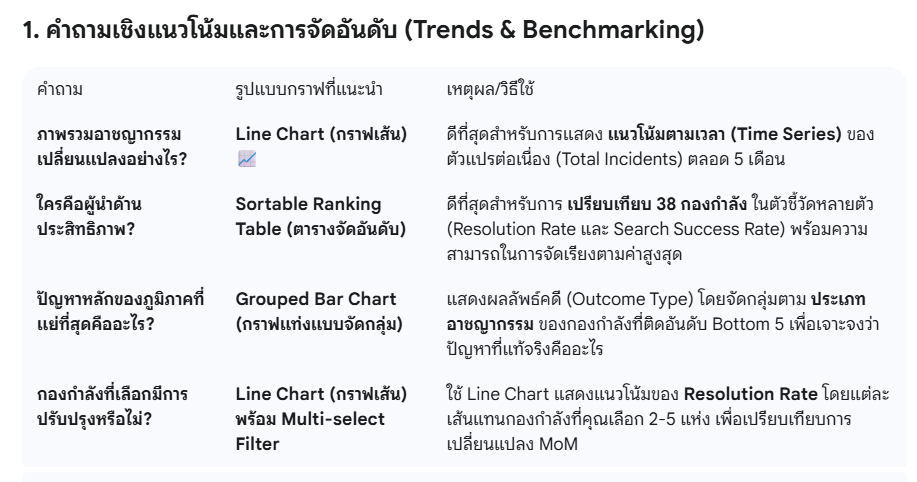

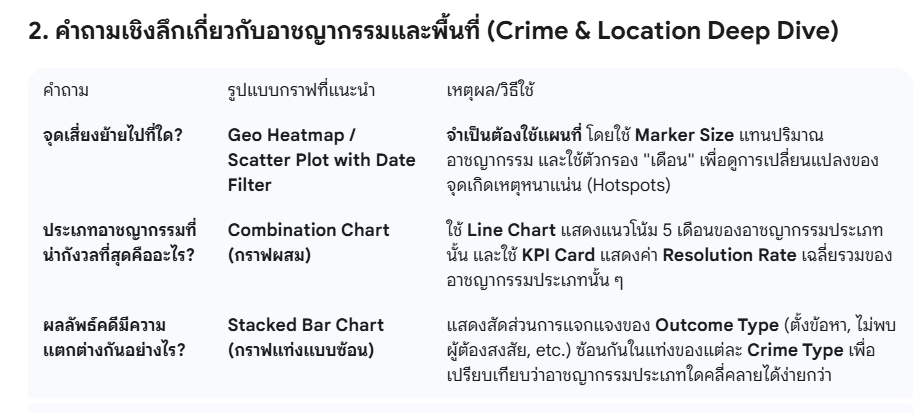

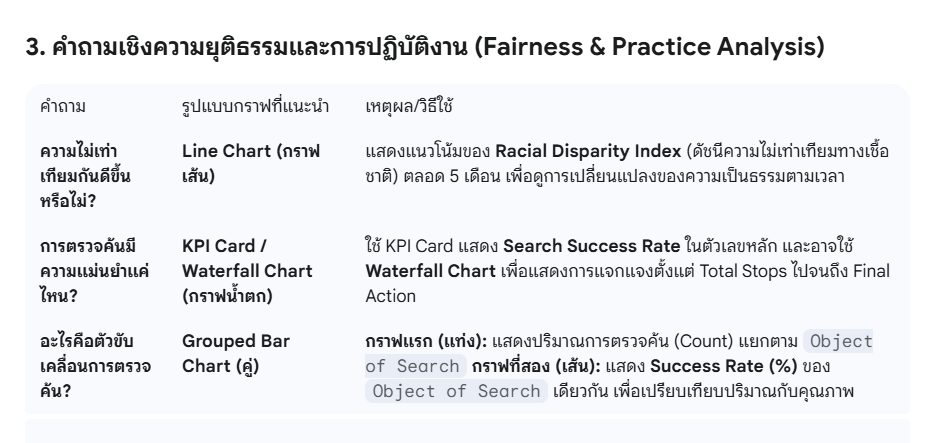

-----------------------------------------------------------

# Clean Data

##Stop and search

## Outcomes

In [31]:
import os
import pandas as pd

base_path = '/content/drive/MyDrive/JENZY/Data'
all_outcomes_dfs = []

for month in range(1, 6):  # Iterate from month 1 to 5
    month_str = f'2025-{month:02d}'
    month_path = os.path.join(base_path, month_str)

    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if 'outcomes.csv' in file:
                filepath = os.path.join(month_path, file)
                try:
                    df = pd.read_csv(filepath)

                    # 1. Extract Police Force Name (renamed from City for consistency)
                    # Example filename: 2025-01-avon-and-somerset-outcomes.csv
                    # We want 'avon-and-somerset'
                    file_parts = file.replace('-outcomes.csv', '').split('-')
                    police_force = '-'.join(file_parts[2:]).strip()
                    df['Police_Force'] = police_force

                    # 2. Add Month column (as 01, 02, etc.)
                    df['Month'] = f'{month:02d}'

                    # 3. CRITICAL FIX: Append the DataFrame only once
                    all_outcomes_dfs.append(df)

                except Exception as e:
                    print(f"Error reading file: {filepath} : {e}")
    else:
        print(f"Directory not found: {month_path}")

if all_outcomes_dfs:
    combined_outcomes_2025_all_months = pd.concat(all_outcomes_dfs, ignore_index=True)
    print("Combined DataFrame from 2025-01 to 2025-05 outcomes files with 'Police_Force' and 'Month' columns:")
    print(f"Total rows in combined outcomes data: {len(combined_outcomes_2025_all_months)}")
    display(combined_outcomes_2025_all_months.tail(5))
else:
    print("No outcomes files found in the specified directories.")

Directory not found: /content/drive/MyDrive/JENZY/Data/2025-01
Directory not found: /content/drive/MyDrive/JENZY/Data/2025-02
Directory not found: /content/drive/MyDrive/JENZY/Data/2025-03
Directory not found: /content/drive/MyDrive/JENZY/Data/2025-04
Directory not found: /content/drive/MyDrive/JENZY/Data/2025-05
No outcomes files found in the specified directories.


In [32]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11697
Latitude,11697
Location,0
LSOA code,11699
LSOA name,11699
Outcome type,0


### 1. เติม Dummy - LSOA Missing

In [33]:
# แทนที่ค่าว่างใน LSOA ด้วยข้อความระบุว่าข้อมูลขาดหายไป
imputation_value = 'LSOA Missing'

combined_outcomes_2025_all_months['LSOA code'].fillna(imputation_value, inplace=True)
combined_outcomes_2025_all_months['LSOA name'].fillna(imputation_value, inplace=True)

/tmp/ipython-input-287462184.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_outcomes_2025_all_months['LSOA code'].fillna(imputation_value, inplace=True)
/tmp/ipython-input-287462184.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [34]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11697
Latitude,11697
Location,0
LSOA code,0
LSOA name,0
Outcome type,0


In [35]:
# 2. สร้าง Flag Column เพื่อระบุว่าแถวใดถูกเติมค่า
combined_outcomes_2025_all_months['Is_LonLat_Imputed'] = combined_outcomes_2025_all_months['Longitude'].isnull()

# 3. เติมค่าว่าง Longitude/Latitude ด้วยค่ามัธยฐานของ LSOA
combined_outcomes_2025_all_months['Longitude'] = combined_outcomes_2025_all_months.apply(
    lambda row: lsoa_coords_median.loc[row['LSOA name'], 'Longitude']
    if pd.isna(row['Longitude']) and row['LSOA name'] != 'LSOA Missing'
    else row['Longitude'],
    axis=1
)

combined_outcomes_2025_all_months['Latitude'] = combined_outcomes_2025_all_months.apply(
    lambda row: lsoa_coords_median.loc[row['LSOA name'], 'Latitude']
    if pd.isna(row['Latitude']) and row['LSOA name'] != 'LSOA Missing'
    else row['Latitude'],
    axis=1
)

In [36]:
# สร้างคอลัมน์ Flag เพื่อติดตามการเปลี่ยนแปลง
combined_outcomes_2025_all_months['Is_LonLat_Imputed'] = combined_outcomes_2025_all_months['Longitude'].isnull()

In [37]:
# คำนวณค่ามัธยฐานของ Longitude และ Latitude สำหรับ LSOA แต่ละชื่อ
# (เฉพาะ LSOA ที่มีข้อมูลพิกัดสมบูรณ์เท่านั้น)
lsoa_coords_median = combined_outcomes_2025_all_months.groupby('LSOA name')[['Longitude', 'Latitude']].median()

In [38]:
lsoa_coords_median

,Longitude,Latitude
LSOA name,,
Adur 001A,-0.229294,50.838727
Adur 001B,-0.229178,50.842916
Adur 001C,-0.248279,50.844526
Adur 001D,-0.237253,50.842826
Adur 001E,-0.250139,50.840394
...,...,...
York 024B,-1.097780,53.918622
York 024C,-1.097800,53.916285
York 024D,-1.141180,53.920221


In [39]:
# 1. เติมค่าว่างใน Longitude
combined_outcomes_2025_all_months['Longitude'] = combined_outcomes_2025_all_months.apply(
    lambda row: lsoa_coords_median.loc[row['LSOA name'], 'Longitude']
    if pd.isna(row['Longitude']) and row['LSOA name'] in lsoa_coords_median.index
    else row['Longitude'],
    axis=1
)

# 2. เติมค่าว่างใน Latitude
combined_outcomes_2025_all_months['Latitude'] = combined_outcomes_2025_all_months.apply(
    lambda row: lsoa_coords_median.loc[row['LSOA name'], 'Latitude']
    if pd.isna(row['Latitude']) and row['LSOA name'] in lsoa_coords_median.index
    else row['Latitude'],
    axis=1
)

In [40]:
combined_outcomes_2025_all_months.isnull().sum()

,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,0
LSOA name,0
Outcome type,0


In [41]:
import plotly.express as px

# Create a scatter plot on a map using Latitude and Longitude
# Using a subset of the data for faster plotting if the dataset is large
# You can adjust the sample size or remove .sample() if needed
sample_df = combined_outcomes_2025_all_months.sample(min(10000, len(combined_outcomes_2025_all_months)), random_state=42)

fig = px.scatter_mapbox(sample_df,
                        lat="Latitude",
                        lon="Longitude",
                        # You can add color or size based on other columns if relevant
                        # color="Outcome type",
                        # size="some_numerical_column",
                        hover_name="LSOA name", # Display LSOA name on hover
                        zoom=5, # Adjust zoom level as needed
                        height=500)

fig.update_layout(mapbox_style="open-street-map") # Use OpenStreetMap style
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

##Street

### เติมค่าว่างในคอลัมน์ 'Crime ID' ด้วย 'Unknown'

In [42]:
# เติมค่าว่างในคอลัมน์ 'Crime ID' ด้วย 'Unknown'
combined_street_2025_all_months['Crime ID'].fillna('Unknown', inplace=True)

# ตรวจสอบค่าว่างอีกครั้งเพื่อให้แน่ใจว่าไม่มีค่าว่างในคอลัมน์ 'Crime ID' แล้ว
print("Missing values after filling 'Crime ID':")
display(combined_street_2025_all_months.isnull().sum())

/tmp/ipython-input-1727009890.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Missing values after filling 'Crime ID':


,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,11631
Latitude,11631
Location,0
LSOA code,11736
LSOA name,11736
Crime type,0


### เติมค่าว่างใน Longitude และ Latitude สำหรับแต่ละ Police_Force

In [43]:
# คำนวณค่ามัธยฐานของ Longitude และ Latitude สำหรับแต่ละ Police_Force
police_force_coords_median = combined_street_2025_all_months.groupby('Police_Force')[['Longitude', 'Latitude']].median()

print("Median Longitude and Latitude for each Police Force:")
display(police_force_coords_median)

# เติมค่าว่างใน Longitude และ Latitude โดยใช้ค่ามัธยฐานของ Police_Force นั้นๆ
# ใช้ transform เพื่อให้ได้ Series ที่มีขนาดเท่ากับ DataFrame เดิม
combined_street_2025_all_months['Longitude'] = combined_street_2025_all_months.groupby('Police_Force')['Longitude'].transform(lambda x: x.fillna(x.median()))
combined_street_2025_all_months['Latitude'] = combined_street_2025_all_months.groupby('Police_Force')['Latitude'].transform(lambda x: x.fillna(x.median()))

Median Longitude and Latitude for each Police Force:


,Longitude,Latitude
Police_Force,,
avon-and-somerset,-2.594636,51.416736
bedfordshire,-0.457328,51.919628
btp,-0.203803,51.522614
cambridgeshire,-0.074632,52.410103
cheshire,-2.585564,53.270289
city-of-london,-0.087772,51.514109
cleveland,-1.230707,54.570132
cumbria,-3.067354,54.625871
derbyshire,-1.446369,52.959760


In [44]:
# ตรวจสอบค่าว่างอีกครั้ง
print("\nMissing values after filling Longitude and Latitude by Police Force:")
display(combined_street_2025_all_months.isnull().sum())


Missing values after filling Longitude and Latitude by Police Force:


,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,11736
LSOA name,11736
Crime type,0


In [45]:
combined_street_2025_all_months.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Police_Force
0,8c7661d1b68d476454c5b68a58daee0d91781a94f60015...,01,City of London Police,City of London Police,-0.107682,51.517786,On or near B521,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,NaN,city-of-london
1,1b7fbc8deac5182e6b1e580ab4eb4ed520df688c3576bc...,01,City of London Police,City of London Police,-0.111596,51.518281,On or near Chancery Lane,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,NaN,city-of-london
2,8476f32b188fae2d0d14b7db79e872fd7688f064e8ced3...,01,City of London Police,City of London Police,-0.097078,51.519045,On or near A1,E01000001,City of London 001A,Drugs,Further investigation is not in the public int...,NaN,city-of-london
3,92b8de6e45c3b711e802fb9d99e2a030c3f56b1c589e55...,01,City of London Police,City of London Police,-0.097290,51.521575,On or near Fann Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,NaN,city-of-london
4,023587ed2c674a28bd52d6e03d505c3b0dba6d25e8b95b...,01,City of London Police,City of London Police,-0.098519,51.517332,On or near Little Britain,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,NaN,city-of-london


### ลบคอลัมน์ 'Context'

In [46]:
# ลบคอลัมน์ 'Context'
combined_street_2025_all_months.drop(columns=['Context'], inplace=True)

# ตรวจสอบว่าคอลัมน์ถูกลบไปแล้ว
print("Columns after dropping 'Context':")
display(combined_street_2025_all_months.columns)
print("\nMissing values after dropping 'Context':")
display(combined_street_2025_all_months.isnull().sum())

Columns after dropping 'Context':


Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Police_Force'],
      dtype='object')


Missing values after dropping 'Context':


,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,11736
LSOA name,11736
Crime type,0


### เติมค่าว่างในคอลัมน์ 'LSOA code' และ 'LSOA name' ด้วย 'Unknown'
### เติมค่าว่างในคอลัมน์ 'Last outcome category' ด้วย 'Unknown'

In [47]:
# เติมค่าว่างในคอลัมน์ 'LSOA code' และ 'LSOA name' ด้วย 'Unknown'
combined_street_2025_all_months['LSOA code'] = combined_street_2025_all_months['LSOA code'].fillna('Unknown')
combined_street_2025_all_months['LSOA name'] = combined_street_2025_all_months['LSOA name'].fillna('Unknown')

# เติมค่าว่างในคอลัมน์ 'Last outcome category' ด้วย 'Unknown'
combined_street_2025_all_months['Last outcome category'] = combined_street_2025_all_months['Last outcome category'].fillna('Unknown')

# ตรวจสอบค่าว่างอีกครั้งเพื่อให้แน่ใจว่าไม่มีค่าว่างในคอลัมน์เหล่านี้แล้ว
print("Missing values after filling LSOA code, LSOA name, and Last outcome category:")
display(combined_street_2025_all_months.isnull().sum())

Missing values after filling LSOA code, LSOA name, and Last outcome category:


,0
Crime ID,0
Month,0
Reported by,0
Falls within,0
Longitude,0
Latitude,0
Location,0
LSOA code,0
LSOA name,0
Crime type,0


In [48]:
# ตรวจสอบแถวซ้ำ
print("\nChecking for duplicate rows in combined_street_2025_all_months:")
duplicate_rows_street = combined_street_2025_all_months.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_street}")


Checking for duplicate rows in combined_street_2025_all_months:
Number of duplicate rows: 27670


### ลบแถวซ้ำ

In [49]:
# ลบแถวซ้ำใน DataFrame
combined_street_2025_all_months.drop_duplicates(inplace=True)

# ตรวจสอบจำนวนแถวซ้ำอีกครั้งหลังจากลบ
print("\nChecking for duplicate rows after removal:")
duplicate_rows_street_after_drop = combined_street_2025_all_months.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_street_after_drop}")

print("\nInfo of the DataFrame after removing duplicates:")
combined_street_2025_all_months.info()


Checking for duplicate rows after removal:
Number of duplicate rows after removal: 0

Info of the DataFrame after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 657006 entries, 0 to 684675
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               657006 non-null  object 
 1   Month                  657006 non-null  object 
 2   Reported by            657006 non-null  object 
 3   Falls within           657006 non-null  object 
 4   Longitude              657006 non-null  float64
 5   Latitude               657006 non-null  float64
 6   Location               657006 non-null  object 
 7   LSOA code              657006 non-null  object 
 8   LSOA name              657006 non-null  object 
 9   Crime type             657006 non-null  object 
 10  Last outcome category  657006 non-null  object 
 11  Police_Force           657006 non-null  object 
dtypes: float64(

In [50]:
combined_street_2025_all_months.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Police_Force
0,8c7661d1b68d476454c5b68a58daee0d91781a94f60015...,01,City of London Police,City of London Police,-0.107682,51.517786,On or near B521,E01000917,Camden 027C,Other theft,Investigation complete; no suspect identified,city-of-london
1,1b7fbc8deac5182e6b1e580ab4eb4ed520df688c3576bc...,01,City of London Police,City of London Police,-0.111596,51.518281,On or near Chancery Lane,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,city-of-london
2,8476f32b188fae2d0d14b7db79e872fd7688f064e8ced3...,01,City of London Police,City of London Police,-0.097078,51.519045,On or near A1,E01000001,City of London 001A,Drugs,Further investigation is not in the public int...,city-of-london
3,92b8de6e45c3b711e802fb9d99e2a030c3f56b1c589e55...,01,City of London Police,City of London Police,-0.097290,51.521575,On or near Fann Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,city-of-london
4,023587ed2c674a28bd52d6e03d505c3b0dba6d25e8b95b...,01,City of London Police,City of London Police,-0.098519,51.517332,On or near Little Britain,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,city-of-london


In [51]:
# Define the base path in your Google Drive where you want to save the files
drive_path = '/content/drive/MyDrive/JENZY/Data'

# Create the directory if it doesn't exist
import os
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

# Save combined_street_2025_all_months to Excel
street_excel_path = os.path.join(drive_path, 'combined_street_2025_all_months.xlsx')
combined_street_2025_all_months.to_excel(street_excel_path, index=False)
print(f"Saved combined_street_2025_all_months to {street_excel_path}")

Saved combined_street_2025_all_months to /content/drive/MyDrive/JENZY/Data/combined_street_2025_all_months.xlsx


# คำถาม อย่างต่ำคนละ 2 คำถาม

##Stop and search

##Outcomes

In [52]:
combined_outcomes_2025_all_months

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Police_Force,Is_LonLat_Imputed
0,1179fef0b4d1e9169ddad5394155b0c65b817b77bce63e...,01,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.132298,52.219264,On or near A1309,E01018008,Cambridge 004C,Suspect charged,cambridgeshire,False
1,e655ecd4874233d2579952e36e7802e6be90d2b48a34fe...,01,Cambridgeshire Constabulary,Cambridgeshire Constabulary,-0.180568,52.350679,On or near Parking Area,E01018146,Huntingdonshire 008D,Investigation complete; no suspect identified,cambridgeshire,False
2,00223d3da970373184014e063287b4ccd12666015fd408...,01,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.163831,52.677948,On or near Cherry Road,E01018108,Fenland 002D,Unable to prosecute suspect,cambridgeshire,False
3,a72b531d38214f2fad7d17612aa84852104c1ea52092f6...,01,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.095323,52.209766,On or near The Lawns,E01035516,Cambridge 007I,Investigation complete; no suspect identified,cambridgeshire,False
4,c06e0f8fad07dcf1cd91bed0af98e26adf9239e156eb7b...,01,Cambridgeshire Constabulary,Cambridgeshire Constabulary,0.080885,52.575782,On or near Prison,E01018081,Fenland 005A,Unable to prosecute suspect,cambridgeshire,False
...,...,...,...,...,...,...,...,...,...,...,...,...
794198,626e22babc731a732583a55a8b7cd3e3bf35fb468fec11...,05,Wiltshire Police,Wiltshire Police,-2.137578,51.372429,On or near Watson's Court,E01032068,Wiltshire 022D,Investigation complete; no suspect identified,wiltshire,False
794199,3147bcee9f8984a56eca43b272ff501f69d987960428c4...,05,Wiltshire Police,Wiltshire Police,-1.781431,51.558845,On or near Regent Circus,E01032714,Swindon 019E,Investigation complete; no suspect identified,wiltshire,False
794200,d95e10fc53ae2a66eb15a8355e19e684f9689e2d430d2c...,05,Wiltshire Police,Wiltshire Police,-1.977236,51.083878,On or near Spracklands,E01032004,Wiltshire 054B,Investigation complete; no suspect identified,wiltshire,False
794201,deb166f2809eed9b8d4ec3995e748ef56885755eabfb06...,05,Wiltshire Police,Wiltshire Police,-1.766340,51.169476,On or near Jaggard View,E01031978,Wiltshire 048E,Investigation complete; no suspect identified,wiltshire,False


### คำนวณสัดส่วนผลลัพธ์คดี (Outcome Type Distribution)


เราจะจัดกลุ่มผลลัพธ์ทั้งหมดตาม Police_Force และ Outcome type เพื่อหาว่าแต่ละกองกำลังตำรวจมีสัดส่วนการปิดคดีเป็นอย่างไร

In [53]:
# นับจำนวนแต่ละ Outcome Type ต่อ Police Force
outcome_distribution = combined_outcomes_2025_all_months.groupby(
    ['Police_Force', 'Outcome type']
).size().reset_index(name='Outcome_Count')

# คำนวณจำนวนคดีรวมต่อ Police Force
total_outcomes_by_force = outcome_distribution.groupby('Police_Force')['Outcome_Count'].sum().reset_index(name='Total_Outcomes')

# รวมข้อมูลและคำนวณสัดส่วน
outcome_analysis_df = pd.merge(outcome_distribution, total_outcomes_by_force, on='Police_Force')

outcome_analysis_df['Proportion'] = (
    outcome_analysis_df['Outcome_Count'] / outcome_analysis_df['Total_Outcomes']
) * 100

print("Outcome Distribution Analysis (sample):")
display(outcome_analysis_df.head())

Outcome Distribution Analysis (sample):


,Police_Force,Outcome type,Outcome_Count,Total_Outcomes,Proportion
0,avon-and-somerset,Action to be taken by another organisation,307,16475,1.863429
1,avon-and-somerset,Formal action is not in the public interest,930,16475,5.644917
2,avon-and-somerset,Further action is not in the public interest,264,16475,1.602428
3,avon-and-somerset,Further investigation is not in the public int...,695,16475,4.218513
4,avon-and-somerset,Investigation complete; no suspect identified,921,16475,5.590288


<Figure size 1400x800 with 0 Axes>

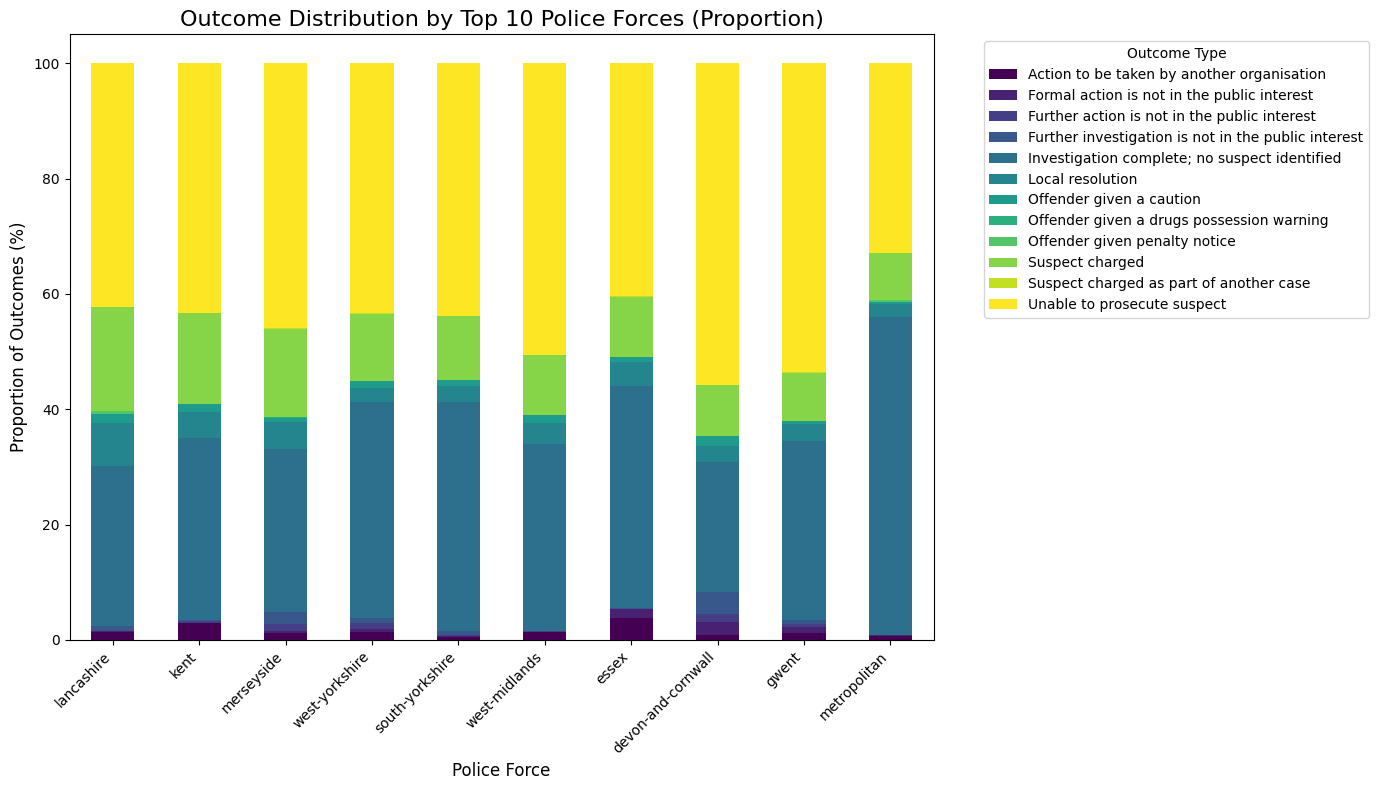

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# เลือกกองกำลังตำรวจ 10 อันดับแรกที่มีปริมาณคดีสูงสุดเพื่อไม่ให้กราฟแน่นเกินไป
top_forces = outcome_analysis_df.groupby('Police_Force')['Total_Outcomes'].sum().nlargest(10).index
plot_data = outcome_analysis_df[outcome_analysis_df['Police_Force'].isin(top_forces)]

# จัดเรียงตามสัดส่วน 'Suspect charged' เพื่อเปรียบเทียบประสิทธิภาพ
# Note: อาจต้องทำการ pivot table ก่อนเพื่อใช้ Stacked Bar ที่ง่ายขึ้น
pivot_plot_data = plot_data.pivot(
    index='Police_Force',
    columns='Outcome type',
    values='Proportion'
).fillna(0)

# จัดเรียง Police Forces ตาม 'Suspect charged' (ประสิทธิภาพสูงไปต่ำ)
pivot_plot_data['Sort_Order'] = pivot_plot_data['Suspect charged']
pivot_plot_data = pivot_plot_data.sort_values(by='Sort_Order', ascending=False).drop(columns='Sort_Order')

# Plotting the Stacked Bar Chart
plt.figure(figsize=(14, 8))
pivot_plot_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Outcome Distribution by Top 10 Police Forces (Proportion)', fontsize=16)
plt.xlabel('Police Force', fontsize=12)
plt.ylabel('Proportion of Outcomes (%)', fontsize=12)
plt.legend(title='Outcome Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### ผลลัพธ์คดีส่วนใหญ่คืออะไร?

Overall Ranking of Outcome Types Across All Police Forces:


,Outcome type,Total_Count,Overall_Proportion
11,Unable to prosecute suspect%,345628%,43.52%
4,Investigation complete; no suspect identified%,295697%,37.23%
9,Suspect charged%,88474%,11.14%
5,Local resolution%,26258%,3.31%
0,Action to be taken by another organisation%,13495%,1.7%
6,Offender given a caution%,7768%,0.98%
3,Further investigation is not in the public int...,6611%,0.83%
1,Formal action is not in the public interest%,4701%,0.59%
2,Further action is not in the public interest%,3940%,0.5%
10,Suspect charged as part of another case%,882%,0.11%


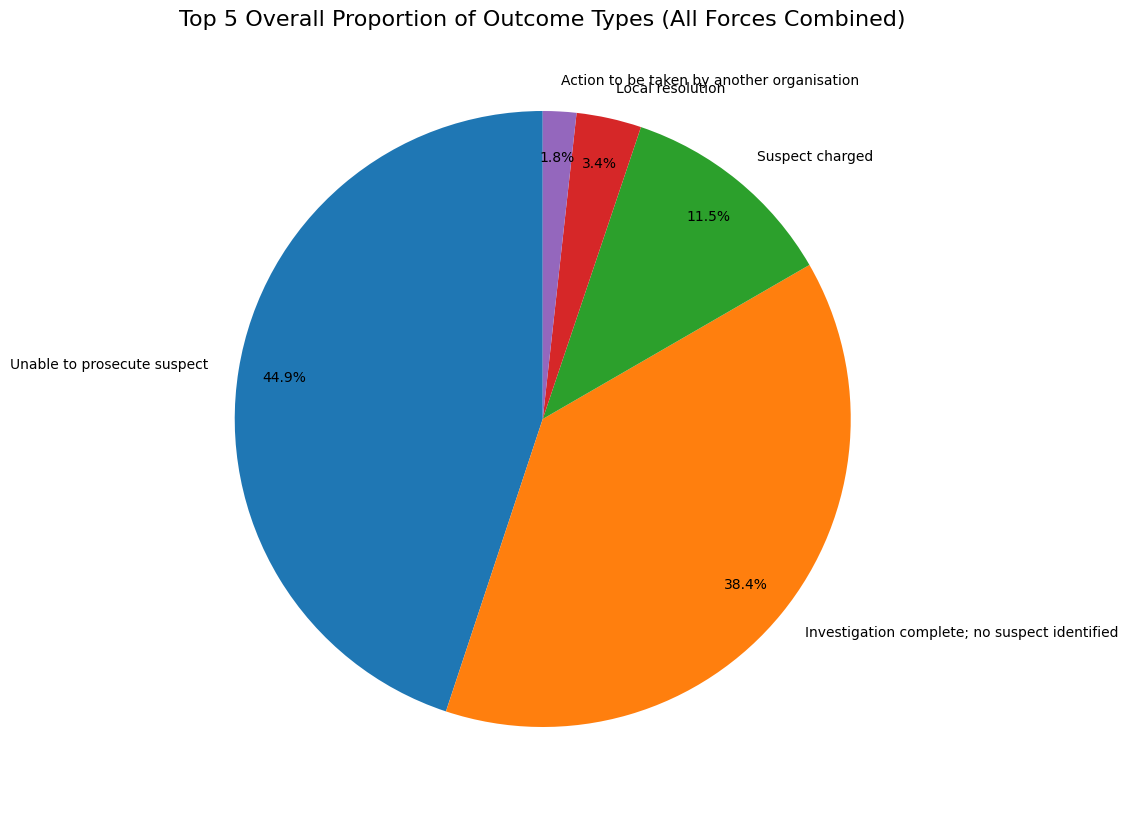

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. คำนวณจำนวนและสัดส่วนของแต่ละ Outcome type ในภาพรวม
total_outcomes_breakdown = combined_outcomes_2025_all_months.groupby('Outcome type').size().reset_index(name='Total_Count')
total_outcomes_breakdown['Overall_Proportion'] = (
    total_outcomes_breakdown['Total_Count'] / total_outcomes_breakdown['Total_Count'].sum()
) * 100

print("Overall Ranking of Outcome Types Across All Police Forces:")
display(total_outcomes_breakdown.sort_values(by='Total_Count', ascending=False).round(2).astype(str) + '%')

# --- Filter for Top 10 Outcome Types ---
top_10_outcomes = total_outcomes_breakdown.nlargest(5, 'Total_Count')

# 2. โค้ดนำเสนอ: Pie Chart (using Top 10)
plt.figure(figsize=(10, 10))
plt.pie(
    top_10_outcomes['Overall_Proportion'],
    labels=top_10_outcomes['Outcome type'],
    autopct='%1.1f%%', # แสดงผลเป็นเปอร์เซ็นต์
    startangle=90,
    pctdistance=0.85 # ระยะห่างของข้อความเปอร์เซ็นต์จากศูนย์กลาง
)
plt.title('Top 5 Overall Proportion of Outcome Types (All Forces Combined)', fontsize=16)
plt.show()

### เมืองไหนจับคนร้ายเก่งสุด? (Suspect Charged)

Top 5 Police Forces by Proportion of 'Suspect charged' Outcomes:


,Police_Force,Proportion
246,norfolk%,19.03%
282,northumbria%,18.72%
266,north-yorkshire%,18.67%
195,lancashire%,18.18%
67,cumbria%,16.69%


/tmp/ipython-input-252040799.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




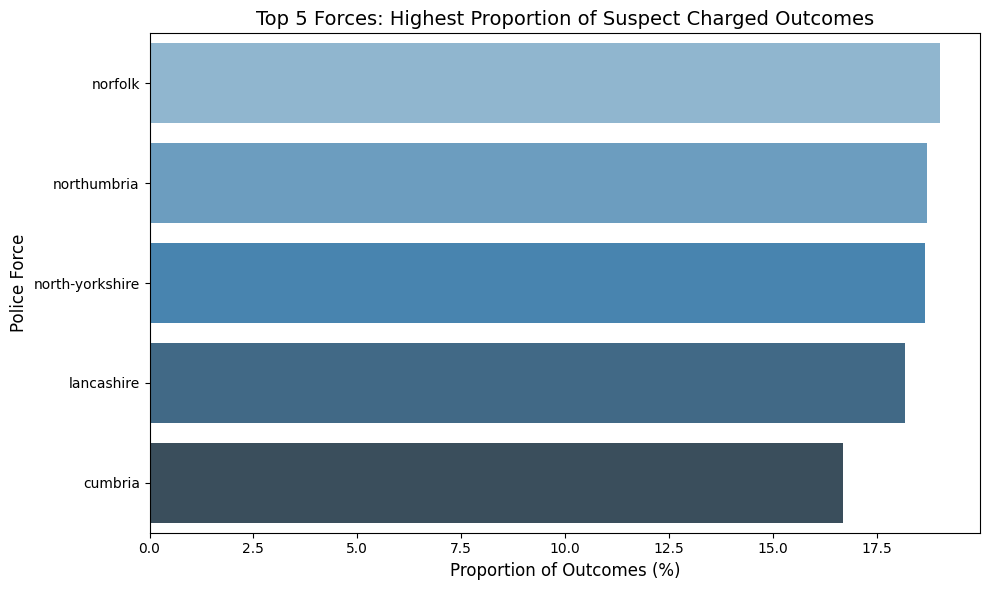

In [56]:
# ต้องรันโค้ด A จากคำตอบก่อนหน้าเพื่อให้ได้ outcome_analysis_df ก่อน
# ... (สมมติว่า outcome_analysis_df ถูกสร้างขึ้นแล้ว)

# 1. กรองเฉพาะ 'Suspect charged' และจัดอันดับ
charged_analysis = outcome_analysis_df[
    outcome_analysis_df['Outcome type'] == 'Suspect charged'
].sort_values(by='Proportion', ascending=False).head(5)

print("Top 5 Police Forces by Proportion of 'Suspect charged' Outcomes:")
display(charged_analysis[['Police_Force', 'Proportion']].round(2).astype(str) + '%')

# 2. โค้ดนำเสนอ: Horizontal Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Proportion',
    y='Police_Force',
    data=charged_analysis,
    palette='Blues_d'
)
plt.title('Top 5 Forces: Highest Proportion of Suspect Charged Outcomes', fontsize=14)
plt.xlabel('Proportion of Outcomes (%)', fontsize=12)
plt.ylabel('Police Force', fontsize=12)
plt.tight_layout()
plt.show()

### การตั้งข้อหาน้อยลงไหม?

Monthly Trend of Suspect Charged Proportion (All Forces Combined):


,Month,Charged_Proportion
0,01%,11.05%
1,02%,11.38%
2,03%,11.6%
3,04%,10.71%
4,05%,10.04%


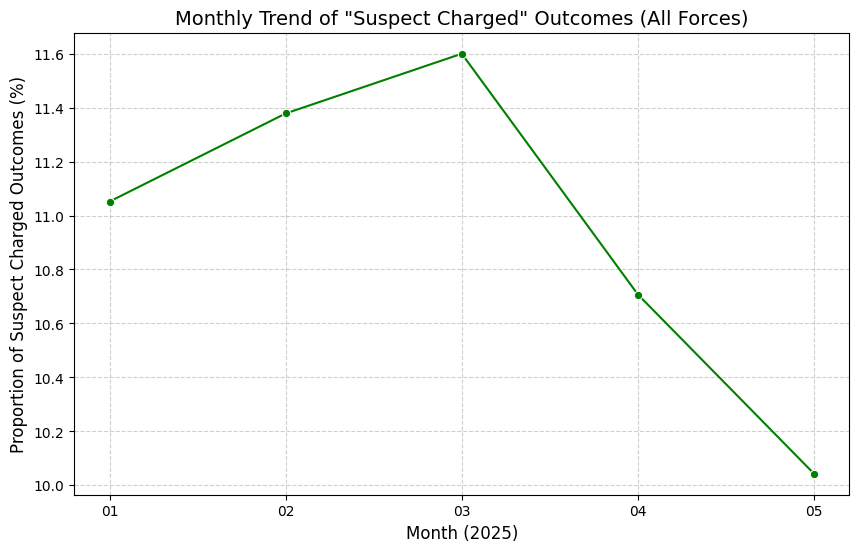

In [57]:
# 1. คำนวณสัดส่วน 'Suspect Charged' รายเดือน
monthly_charged = combined_outcomes_2025_all_months.groupby('Month').size().reset_index(name='Total_Count')

# นับเฉพาะ Suspect Charged รายเดือน
charged_monthly_count = combined_outcomes_2025_all_months[
    combined_outcomes_2025_all_months['Outcome type'] == 'Suspect charged'
].groupby('Month').size().reset_index(name='Charged_Count')

# รวมและคำนวณสัดส่วน
monthly_trend_df = pd.merge(monthly_charged, charged_monthly_count, on='Month', how='left').fillna(0)
monthly_trend_df['Charged_Proportion'] = (
    monthly_trend_df['Charged_Count'] / monthly_trend_df['Total_Count']
) * 100

print("Monthly Trend of Suspect Charged Proportion (All Forces Combined):")
display(monthly_trend_df[['Month', 'Charged_Proportion']].round(2).astype(str) + '%')

# 2. โค้ดนำเสนอ: Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Month',
    y='Charged_Proportion',
    data=monthly_trend_df,
    marker='o',
    color='green'
)
plt.title('Monthly Trend of "Suspect Charged" Outcomes (All Forces)', fontsize=14)
plt.xlabel('Month (2025)', fontsize=12)
plt.ylabel('Proportion of Suspect Charged Outcomes (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##Street

### หน่วยงานตำรวจ (Police Force) ใดดูแลพื้นที่ที่มีคดีมากที่สุดและคดีนั้นคืออะไร?

In [58]:
# นับจำนวนคดี (rows) ในแต่ละ Police Force
crime_counts_by_force = combined_street_2025_all_months.groupby('Police_Force').size().reset_index(name='Total_Crimes')

# เรียงจากมากไปน้อย
crime_counts_by_force = crime_counts_by_force.sort_values(by='Total_Crimes', ascending=False)

# แสดงผลลัพธ์
print("จำนวนคดีที่เกิดขึ้นในแต่ละ Police Force:")
display(crime_counts_by_force.head(10))  # แสดง 10 อันดับแรก

จำนวนคดีที่เกิดขึ้นในแต่ละ Police Force:


,Police_Force,Total_Crimes
24,metropolitan,79977
37,thames-valley,28276
0,avon-and-somerset,27972
40,west-midlands,25226
32,south-yorkshire,24894
20,lancashire,24516
29,northumbria,24236
41,west-yorkshire,22891
9,devon-and-cornwall,21708
23,merseyside,21699


In [59]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [60]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

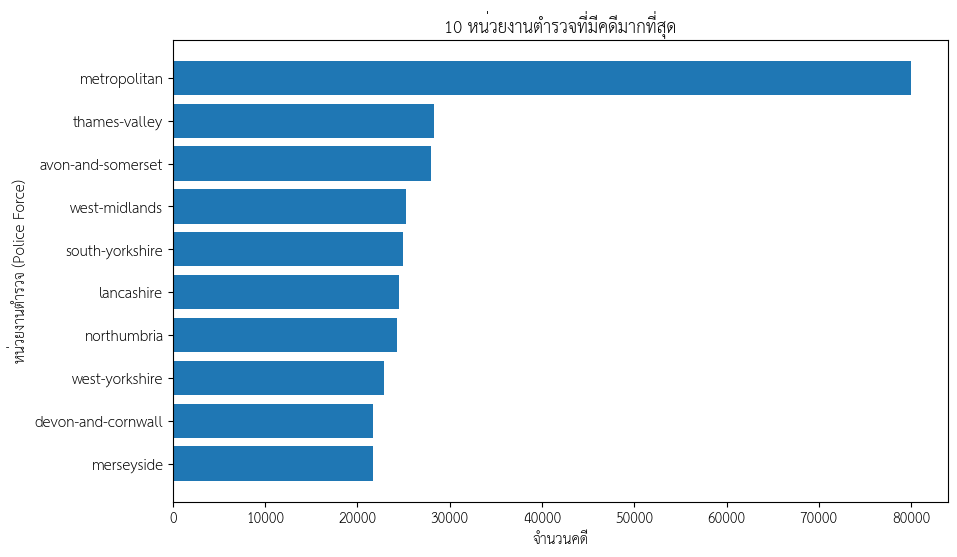

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(crime_counts_by_force['Police_Force'][:10], crime_counts_by_force['Total_Crimes'][:10])
plt.xlabel('จำนวนคดี')
plt.ylabel('หน่วยงานตำรวจ (Police Force)')
plt.title('10 หน่วยงานตำรวจที่มีคดีมากที่สุด')
plt.gca().invert_yaxis()  # ให้มากที่สุดอยู่ด้านบน
plt.show()

In [62]:
# ค้นหาหน่วยงานตำรวจที่มีจำนวนคดีมากที่สุด
most_crimes_police_force = crime_counts_by_force.iloc[0]['Police_Force']

print(f"หน่วยงานตำรวจที่มีคดีมากที่สุดคือ: {most_crimes_police_force}")

# กรอง DataFrame สำหรับหน่วยงานตำรวจที่มีคดีมากที่สุด
most_crimes_df = combined_street_2025_all_months[
    combined_street_2025_all_months['Police_Force'] == most_crimes_police_force
]

# นับจำนวนคดีของแต่ละประเภทอาชญากรรมในหน่วยงานตำรวจนั้น
crime_type_counts_in_most_crimes_force = most_crimes_df['Crime type'].value_counts()

print(f"\nประเภทอาชญากรรมที่พบมากที่สุดใน {most_crimes_police_force}:")
display(crime_type_counts_in_most_crimes_force.head()) # แสดง 5 อันดับแรก

หน่วยงานตำรวจที่มีคดีมากที่สุดคือ: metropolitan

ประเภทอาชญากรรมที่พบมากที่สุดใน metropolitan:


,count
Crime type,
Violence and sexual offences,19678
Anti-social behaviour,9163
Other theft,7953
Theft from the person,7581
Vehicle crime,7278


### ประเภทอาชญากรรมใดพบมากที่สุดโดยรวม

In [63]:
# นับจำนวนคดีของแต่ละประเภทอาชญากรรมทั้งหมด
overall_crime_type_counts = combined_street_2025_all_months['Crime type'].value_counts()

print("ประเภทอาชญากรรมที่พบมากที่สุดโดยรวม:")
display(overall_crime_type_counts)

ประเภทอาชญากรรมที่พบมากที่สุดโดยรวม:


,count
Crime type,
Violence and sexual offences,248074
Anti-social behaviour,69836
Shoplifting,59366
Criminal damage and arson,51178
Public order,46608
Other theft,45818
Vehicle crime,36025
Burglary,27853
Drugs,24257


### ประเภทอาชญากรรมใดมีแนวโน้มเพิ่มขึ้น

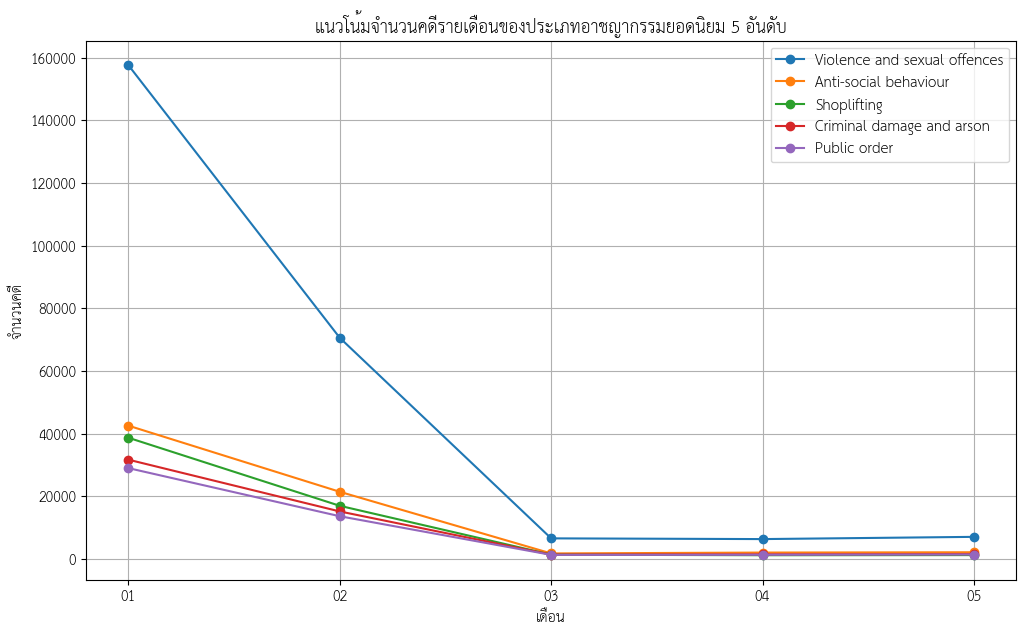

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# นับจำนวนคดีต่อ Crime Type ในแต่ละเดือน
trend_by_type = (
    combined_street_2025_all_months
    .groupby(['Crime type', 'Month'])
    .size()
    .reset_index(name='Total_Crimes')
)

# เรียงเดือนให้ถูกลำดับ (กรณี Month เป็น string)
trend_by_type['Month'] = pd.Categorical(
    trend_by_type['Month'],
    categories=sorted(trend_by_type['Month'].unique()),
    ordered=True
)

trend_by_type = trend_by_type.sort_values(['Crime type', 'Month'])

# วาดกราฟแนวโน้มสำหรับ Crime Type ยอดนิยม 5 อันดับ
top5_types = (
    combined_street_2025_all_months['Crime type']
    .value_counts()
    .head(5)
    .index
)

plt.figure(figsize=(12,7))
for ctype in top5_types:
    data = trend_by_type[trend_by_type['Crime type'] == ctype]
    plt.plot(data['Month'], data['Total_Crimes'], marker='o', label=ctype)

plt.title("แนวโน้มจำนวนคดีรายเดือนของประเภทอาชญากรรมยอดนิยม 5 อันดับ")
plt.xlabel("เดือน")
plt.ylabel("จำนวนคดี")
plt.legend()
plt.grid(True)
plt.show()


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Location and Month and count occurrences
location_monthly_counts = combined_street_2025_all_months.groupby(['Location', 'Month']).size().reset_index(name='Crime_Count')

# Filter for locations that appear in all 5 months (or a significant number of months)
# This helps focus on locations with more consistent data over time
location_month_counts = location_monthly_counts.groupby('Location')['Month'].nunique().reset_index(name='Month_Count')
consistent_locations = location_month_counts[location_month_counts['Month_Count'] >= 5]['Location'] # Adjust threshold as needed

# Filter the monthly counts for consistent locations
consistent_location_trends = location_monthly_counts[location_monthly_counts['Location'].isin(consistent_locations)].copy() # Use .copy() to avoid SettingWithCopyWarning

# Ensure 'Month' is treated as ordered categorical for correct plotting
consistent_location_trends['Month'] = pd.Categorical(
    consistent_location_trends['Month'],
    categories=sorted(consistent_location_trends['Month'].unique()),
    ordered=True
)

# Sort for plotting
consistent_location_trends = consistent_location_trends.sort_values(['Location', 'Month'])

# To identify increasing trends programmatically, we can look for locations
# where the crime count in month 5 is greater than in month 1 (as a simple example)
# A more robust analysis might involve linear regression or other trend analysis methods.

# Simple trend check: count in month 5 > count in month 1
# Pivot the data to have locations as index and months as columns
pivot_location_trends = consistent_location_trends.pivot(index='Location', columns='Month', values='Crime_Count').fillna(0)

# Identify locations where crime count increased from month 1 to month 5
increasing_trend_locations = pivot_location_trends[
    pivot_location_trends['05'] > pivot_location_trends['01']
].index.tolist()

print("Locations with an increasing trend in crime count from Jan to May 2025 (based on simple comparison):")
if increasing_trend_locations:
    # Display a sample of these locations
    display(increasing_trend_locations[:10]) # Display up to 10 locations

    # Optional: Plot trends for a few of these locations to visualize
    # plt.figure(figsize=(12, 7))
    # for location in increasing_trend_locations[:5]: # Plotting trends for first 5
    #     data = consistent_location_trends[consistent_location_trends['Location'] == location]
    #     sns.lineplot(x='Month', y='Crime_Count', data=data, marker='o', label=location)

    # plt.title("Monthly Crime Trend for Selected Locations with Increasing Trends")
    # plt.xlabel("Month (2025)")
    # plt.ylabel("Number of Crimes")
    # plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.grid(True, linestyle='--', alpha=0.6)
    # plt.tight_layout()
    # plt.show()

else:
    print("No locations with a simple increasing trend found among those with consistent data.")

Locations with an increasing trend in crime count from Jan to May 2025 (based on simple comparison):


['On or near A363',
 'On or near A40',
 'On or near A4289',
 'On or near A479',
 'On or near A487',
 'On or near Abbotsbury Way',
 'On or near Adderley Avenue',
 'On or near Adlam Way',
 'On or near Affleck Close',
 'On or near Alderton Way']

### ประเภทอาชญากรรมที่พบบ่อยที่สุดในแต่ละ Police Force คืออะไร?

In [76]:
# Group by Police_Force and Crime type and count occurrences
crime_type_by_force = combined_street_2025_all_months.groupby(['Police_Force', 'Crime type']).size().reset_index(name='Crime_Count')

# Find the most frequent crime type for each police force
# Use idxmax() to get the index of the maximum count within each group
most_frequent_crime_by_force = crime_type_by_force.loc[crime_type_by_force.groupby('Police_Force')['Crime_Count'].idxmax()]

print("ประเภทอาชญากรรมที่พบบ่อยที่สุดในแต่ละ Police Force:")
display(most_frequent_crime_by_force.head())

ประเภทอาชญากรรมที่พบบ่อยที่สุดในแต่ละ Police Force:


,Police_Force,Crime type,Crime_Count
13,avon-and-somerset,Violence and sexual offences,11509
27,bedfordshire,Violence and sexual offences,3318
40,btp,Violence and sexual offences,532
54,cambridgeshire,Violence and sexual offences,4464
68,cheshire,Violence and sexual offences,3008


### มีการกระจุกตัวของประเภทอาชญากรรมบางประเภทในพื้นที่ (LSOA) ใดเป็นพิเศษหรือไม่?

### สถานที่ (Location) ใดที่มีจำนวนคดีสูงที่สุด?

### แนวโน้มรายเดือนของประเภทอาชญากรรมที่พบมากที่สุดในแต่ละ Police Force

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Police_Force, Month, and Crime type and count occurrences
force_month_crime_counts = combined_street_2025_all_months.groupby(['Police_Force', 'Month', 'Crime type']).size().reset_index(name='Crime_Count')

# Find the most frequent crime type for each Police_Force and Month
# This requires finding the crime type with the max count within each Police_Force-Month group
idx = force_month_crime_counts.groupby(['Police_Force', 'Month'])['Crime_Count'].idxmax()
most_frequent_crime_monthly_by_force = force_month_crime_counts.loc[idx].reset_index(drop=True)

print("Most Frequent Crime Type Monthly by Police Force (sample):")
display(most_frequent_crime_monthly_by_force.head())

# Visualizing this data would likely involve faceting by Police Force or selecting specific forces

Most Frequent Crime Type Monthly by Police Force (sample):


,Police_Force,Month,Crime type,Crime_Count
0,avon-and-somerset,01,Violence and sexual offences,5877
1,avon-and-somerset,02,Violence and sexual offences,5632
2,bedfordshire,01,Violence and sexual offences,1695
3,bedfordshire,02,Violence and sexual offences,1623
4,btp,01,Violence and sexual offences,532


### แนวโน้มรายเดือนของผลลัพธ์คดี (Last outcome category) บางประเภทในแต่ละ Police Force

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Police_Force, Month, and Last outcome category and count occurrences
force_month_outcome_counts = combined_street_2025_all_months.groupby(['Police_Force', 'Month', 'Last outcome category']).size().reset_index(name='Outcome_Count')

# Calculate total outcomes per month per police force
total_monthly_by_force_street = combined_street_2025_all_months.groupby(['Police_Force', 'Month']).size().reset_index(name='Total_Monthly_Outcomes')

# Merge and calculate proportion
force_month_outcome_proportion = pd.merge(force_month_outcome_counts, total_monthly_by_force_street, on=['Police_Force', 'Month'], how='left').fillna(0)
force_month_outcome_proportion['Proportion (%)'] = (
    force_month_outcome_proportion['Outcome_Count'] / force_month_outcome_proportion['Total_Monthly_Outcomes']
) * 100

print("Monthly Trend of Outcome Categories by Police Force (sample):")
# Display data for a few police forces and selected outcome categories
sample_forces = combined_street_2025_all_months['Police_Force'].value_counts().nlargest(3).index
sample_outcomes = ['Suspect charged', 'Unable to prosecute suspect', 'Investigation complete; no suspect identified']

display(force_month_outcome_proportion[
    (force_month_outcome_proportion['Police_Force'].isin(sample_forces)) &
    (force_month_outcome_proportion['Last outcome category'].isin(sample_outcomes))
].sort_values(by=['Police_Force', 'Month', 'Last outcome category']).head(15))

# Visualizing this would involve line plots faceted by Police Force or Outcome Category

Monthly Trend of Outcome Categories by Police Force (sample):


,Police_Force,Month,Last outcome category,Outcome_Count,Total_Monthly_Outcomes,Proportion (%)
5,avon-and-somerset,01,Investigation complete; no suspect identified,430,14411,2.983832
9,avon-and-somerset,01,Unable to prosecute suspect,4278,14411,29.685657
17,avon-and-somerset,02,Investigation complete; no suspect identified,377,13561,2.780031
21,avon-and-somerset,02,Unable to prosecute suspect,4050,13561,29.865054
523,metropolitan,01,Investigation complete; no suspect identified,39349,79977,49.200395
527,metropolitan,01,Unable to prosecute suspect,17449,79977,21.817523
785,thames-valley,01,Investigation complete; no suspect identified,4927,14669,33.587838
790,thames-valley,01,Unable to prosecute suspect,4673,14669,31.856296
796,thames-valley,02,Investigation complete; no suspect identified,4603,13607,33.828177
801,thames-valley,02,Unable to prosecute suspect,4125,13607,30.315279


### แนวโน้มรายเดือนของจำนวนคดีในสถานที่ (Location) ที่มีจำนวนคดีสูงที่สุด 10 อันดับแรก

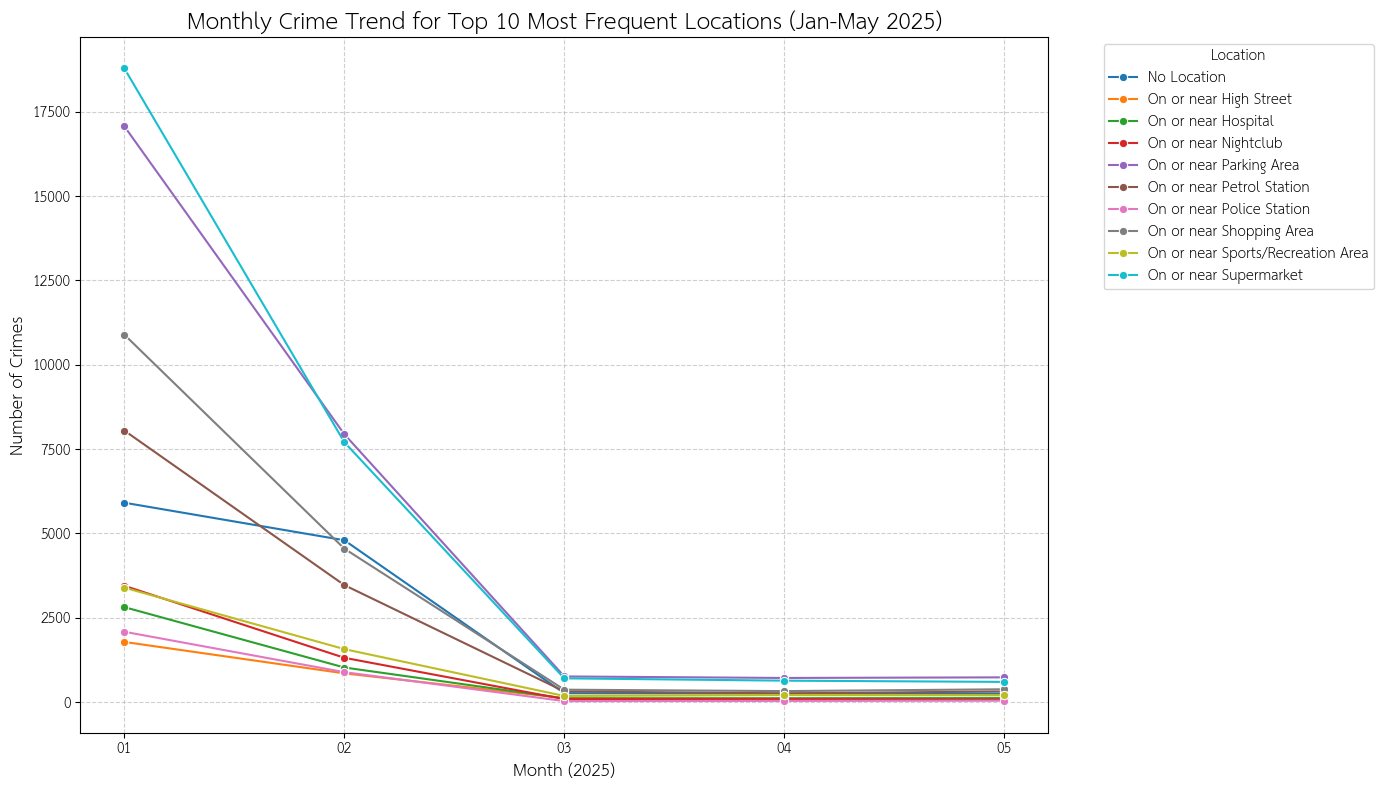

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'location_counts' is available from previous steps
# If not, uncomment and run the code to create it:
# location_counts = combined_street_2025_all_months['Location'].value_counts()

# Get the top 10 locations by total crime count
top_10_locations = location_counts.nlargest(10).index.tolist()

# Filter the original DataFrame for these top 10 locations
top_10_location_data = combined_street_2025_all_months[combined_street_2025_all_months['Location'].isin(top_10_locations)]

# Group by Location and Month and count occurrences
top_10_location_monthly_counts = top_10_location_data.groupby(['Location', 'Month']).size().reset_index(name='Crime_Count')

# Ensure 'Month' is treated as ordered categorical for correct plotting
top_10_location_monthly_counts['Month'] = pd.Categorical(
    top_10_location_monthly_counts['Month'],
    categories=sorted(top_10_location_monthly_counts['Month'].unique()),
    ordered=True
)

# Plotting the monthly trends for the top 10 locations
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Crime_Count', hue='Location', data=top_10_location_monthly_counts, marker='o')

plt.title("Monthly Crime Trend for Top 10 Most Frequent Locations (Jan-May 2025)", fontsize=16)
plt.xlabel("Month (2025)", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [80]:
# Count the occurrences of each 'Location'
location_counts = combined_street_2025_all_months['Location'].value_counts()

print("Top 10 Locations with the Highest Number of Crimes:")
display(location_counts.head(10))

Top 10 Locations with the Highest Number of Crimes:


,count
Location,
On or near Supermarket,28424
On or near Parking Area,27213
On or near Shopping Area,16505
On or near Petrol Station,12399
No Location,11468
On or near Sports/Recreation Area,5542
On or near Nightclub,5001
On or near Hospital,4168
On or near Police Station,3065
